In [7]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score as acs
from sklearn.metrics import f1_score as f1
from sklearn.metrics import recall_score as rs
from sklearn.metrics import precision_score as ps
from sklearn.model_selection import RepeatedKFold
import numpy as np

In [2]:
data_name = ['xyremoved.csv', 'xymean.csv', 'xymode.csv']

In [50]:
from xgboost import XGBClassifier as xgb
n_est = [100, 200, 300, 400, 500, 600, 700, 800, 900]
acs_tr = []
for i in n_est:
    print(i)
    reg = xgb(n_estimators=i)
    data=pd.read_csv('C:\\Users\\prasa\\OneDrive\\Desktop\\ZS_19\\xymean.csv')
    train_main = data[data['is_goal'].notnull()]
    reg.fit(train_main.drop(columns=['is_goal']), train_main['is_goal'])
    pred1 = reg.predict(train_main.drop(columns=['is_goal']))
    acs_tr.append(acs(train_main['is_goal'], pred1))

100
200
300
400
500
600
700
800
900


In [72]:
data=pd.read_csv('C:\\Users\\prasa\\OneDrive\\Desktop\\ZS_19\\xymean.csv')
train_main = data[data['is_goal'].notnull()]
test_main=data[data['is_goal'].isnull()]

In [73]:
len(train_main)

24429

In [81]:
train_main.shape

(24429, 150)

In [83]:
test_main.shape


(6268, 150)

In [80]:
train_main=train_main.drop(columns='Unnamed: 0')

In [82]:
test_main=test_main.drop(columns='Unnamed: 0')

In [100]:
from xgboost import XGBClassifier

Accuracy Score (Train):  0.8505874165950305


In [40]:
len(train)+len(test)

31229

In [117]:
reg

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=4, min_child_weight=1, missing=None,
       n_estimators=280, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [115]:
reg = xgb(n_estimators=280,max_depth=4)
reg.fit(train_main.drop(columns=['is_goal']), train_main['is_goal'])
pred1 = reg.predict_proba(test_main.drop(columns=['is_goal']))

In [116]:
pred1

array([[0.85411894, 0.14588109],
       [0.5138582 , 0.4861418 ],
       [0.60109717, 0.39890283],
       ...,
       [0.57816994, 0.42183006],
       [0.92124325, 0.07875676],
       [0.86900795, 0.13099204]], dtype=float32)

In [97]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [101]:
model = XGBClassifier()

In [105]:

n_estimators = range(200, 400, 50)
param_grid = dict(n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(train_main.drop(columns=['is_goal']), train_main['is_goal'])
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# plot


Best: -0.638372 using {'n_estimators': 300}
-0.638449 (0.002514) with: {'n_estimators': 200}
-0.638424 (0.002824) with: {'n_estimators': 250}
-0.638372 (0.002982) with: {'n_estimators': 300}
-0.638465 (0.002888) with: {'n_estimators': 350}


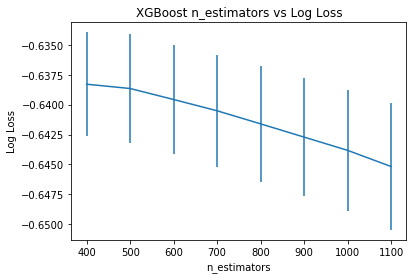

In [104]:
plt.errorbar(n_estimators, means, yerr=stds)
plt.title("XGBoost n_estimators vs Log Loss")
plt.xlabel('n_estimators')
plt.ylabel('Log Loss')
plt.savefig('n_estimators.png')

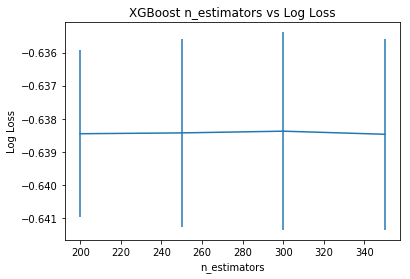

In [106]:
plt.errorbar(n_estimators, means, yerr=stds)
plt.title("XGBoost n_estimators vs Log Loss")
plt.xlabel('n_estimators')
plt.ylabel('Log Loss')
plt.savefig('n_estimators.png')

In [107]:
model = XGBClassifier()
max_depth = range(3, 11, 2)
print(max_depth)
param_grid = dict(max_depth=max_depth)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(train_main.drop(columns=['is_goal']), train_main['is_goal'])
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

range(3, 11, 2)
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  3.9min finished


Best: -0.637738 using {'max_depth': 5}
-0.639492 (0.003780) with: {'max_depth': 3}
-0.637738 (0.003553) with: {'max_depth': 5}
-0.640402 (0.003192) with: {'max_depth': 7}
-0.644346 (0.004149) with: {'max_depth': 9}


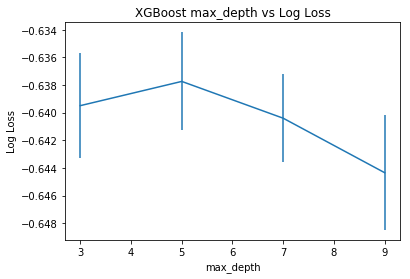

In [109]:
plt.errorbar(max_depth, means, yerr=stds)
plt.title("XGBoost max_depth vs Log Loss")
plt.xlabel('max_depth')
plt.ylabel('Log Loss')
plt.savefig('max_depth.png')


In [111]:
model = XGBClassifier()
n_estimators = [280, 300, 320]
max_depth = [ 4, 5, 6]
print(max_depth)
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=7, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(train_main.drop(columns=['is_goal']), train_main['is_goal'])
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

[4, 5, 6]
Fitting 7 folds for each of 9 candidates, totalling 63 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed: 15.0min finished


Best: -0.639549 using {'max_depth': 4, 'n_estimators': 280}
-0.639549 (0.004207) with: {'max_depth': 4, 'n_estimators': 280}
-0.639868 (0.004203) with: {'max_depth': 4, 'n_estimators': 300}
-0.640184 (0.004484) with: {'max_depth': 4, 'n_estimators': 320}
-0.643136 (0.004118) with: {'max_depth': 5, 'n_estimators': 280}
-0.643715 (0.004035) with: {'max_depth': 5, 'n_estimators': 300}
-0.644181 (0.004026) with: {'max_depth': 5, 'n_estimators': 320}
-0.646593 (0.004086) with: {'max_depth': 6, 'n_estimators': 280}
-0.647358 (0.003909) with: {'max_depth': 6, 'n_estimators': 300}
-0.648248 (0.004133) with: {'max_depth': 6, 'n_estimators': 320}


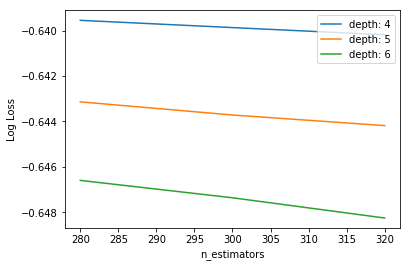

In [113]:
scores = np.array(means).reshape(len(max_depth), len(n_estimators))
for i, value in enumerate(max_depth):
    plt.plot(n_estimators, scores[i], label='depth: ' + str(value))
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('Log Loss')
plt.savefig('n_estimators_vs_max_depth.png')

In [118]:
test_main['is_goal']=pred1

In [120]:
test_main

,shot_id_number,location_x,location_y,remaining_min,power_of_shot,knockout_match,remaining_sec,distance_of_shot,is_goal,home/away,...,game_season_2006-07,game_season_2007-08,game_season_2008-09,game_season_2009-10,game_season_2010-11,game_season_2011-12,game_season_2012-13,game_season_2013-14,game_season_2014-15,game_season_2015-16
0,1,1.447619e+00,-2.181575e-01,1.492440,-1.317979,0.0,-0.080672,0.440837,0.854119,0,...,0,0,0,0,0,0,0,0,0,0
7,8,-5.789778e-02,-7.200115e-01,0.909205,0.416927,0.0,-1.346113,-1.182481,0.513858,0,...,0,0,0,0,0,0,0,0,0,0
16,17,-6.696715e-02,-1.039373e+00,-1.423734,-1.317979,0.0,-1.576194,-1.385395,0.601097,1,...,0,0,0,0,0,0,0,0,0,0
19,20,-6.696715e-02,-1.039373e+00,1.492440,0.416927,0.0,1.012209,-1.385395,0.434382,1,...,0,0,0,0,0,0,0,0,0,0
21,22,1.148329e+00,4.091601e-01,1.200822,0.416927,0.0,-1.403633,0.440837,0.624853,1,...,0,0,0,0,0,0,0,0,0,0
32,33,1.411341e+00,-1.725344e-01,1.784057,-1.317979,0.0,-0.138192,0.339380,0.694098,0,...,0,0,0,0,0,0,0,0,0,0
33,34,5.678892e-01,1.173347e+00,1.492440,-1.317979,0.0,1.702450,0.643752,0.585953,0,...,0,0,0,0,0,0,0,0,0,0
34,35,-5.789778e-02,-8.226635e-01,0.617587,-1.317979,0.0,0.264448,-1.283938,0.554852,0,...,0,0,0,0,0,0,0,0,0,0
35,36,-1.757997e-01,-3.704170e-17,0.034353,-1.317979,0.0,1.702450,-1.283938,0.531112,0,...,0,0,0,0,0,0,0,0,0,0
36,37,-5.789778e-02,-9.937501e-01,-0.257265,-1.317979,0.0,-1.116033,-1.385395,0.376829,0,...,0,0,0,0,0,0,0,0,0,0


In [121]:
submission=test_main[['shot_id_number','is_goal']]

In [ ]:
from sklearn

In [125]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [129]:
model = AdaBoostClassifier(
DecisionTreeClassifier(max_depth=6),
algorithm="SAMME.R")


In [195]:
model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=-1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [132]:
n_estimators = range(250, 350, 30)
param_grid = dict(n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(train_main.drop(columns=['is_goal']), train_main['is_goal'])
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.684114 using {'n_estimators': 310}
-0.684690 (0.000936) with: {'n_estimators': 250}
-0.684418 (0.000728) with: {'n_estimators': 280}
-0.684114 (0.000623) with: {'n_estimators': 310}
-0.684620 (0.000849) with: {'n_estimators': 340}


In [156]:
from sklearn.model_selection import KFold

In [134]:
from sklearn.ensemble import RandomForestClassifier

In [135]:
models = [
           
    RandomForestClassifier( n_jobs=-1, 
                           n_estimators=570, max_depth=19,min_samples_split=6,min_samples_leaf=2),
        
    XGBClassifier( n_jobs=-1, learning_rate=0.1, 
                  n_estimators=280, max_depth=4)
]

In [152]:
import sklearn.model_selection 

In [136]:
from sklearn.ensemble import VotingClassifier

In [146]:
rf1=RandomForestClassifier( n_jobs=-1, n_estimators=570, max_depth=19,min_samples_split=6,min_samples_leaf=2)
        
xgb1=XGBClassifier( n_jobs=-1, learning_rate=0.1, 
                  n_estimators=280, max_depth=4)

In [147]:
eclf = VotingClassifier(estimators=[rf1,xgb1], voting='soft')


In [148]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)


In [158]:
kfold = KFold(n_splits=10)
# create the sub models
estimators = []
model1 = RandomForestClassifier( n_jobs=-1, n_estimators=570, max_depth=19,min_samples_split=6,min_samples_leaf=2)
estimators.append(('rf', model1))
model2 = XGBClassifier( n_jobs=-1, learning_rate=0.1, n_estimators=280, max_depth=4)
estimators.append(('xgb', model2))


# create the ensemble model


In [161]:
ensemble = VotingClassifier(estimators,voting='soft')
results = cross_val_score(ensemble, train_main.drop(columns=['is_goal']), train_main['is_goal'], cv=kfold,scoring='neg_log_loss',n_jobs=-1)
print(results.mean())

-0.6394367932363396


In [180]:
from sklearn.model_selection import train_test_split

In [176]:
models = [
           
    RandomForestClassifier( n_jobs=-1, 
                           n_estimators=570, max_depth=19,min_samples_split=6,min_samples_leaf=2),
        
    XGBClassifier( n_jobs=-1, learning_rate=0.1, 
                  n_estimators=280, max_depth=4)
]

In [181]:
X_train, X_test, y_train, y_test = train_test_split(train_main.drop(columns=['is_goal']), train_main['is_goal'], test_size=0.2, random_state=0)

In [190]:
y_pred

array([[0.6327522 , 0.36724785],
       [0.61209786, 0.3879021 ],
       [0.6436521 , 0.35634792],
       ...,
       [0.6421289 , 0.35787112],
       [0.6449645 , 0.35503548],
       [0.6421289 , 0.35787112]], dtype=float32)

In [ ]:
feature_importances = pd.DataFrame(ensemble.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',                                                                 ascending=False)

In [ ]:
test_main['is_goal']=y_pred

In [192]:
submission=test_main[['shot_id_number','is_goal']]

In [173]:
submission

,shot_id_number,is_goal
0,1,0.738872
7,8,0.528535
16,17,0.533461
19,20,0.442037
21,22,0.603005
32,33,0.632088
33,34,0.537497
34,35,0.525219
35,36,0.516885
36,37,0.390730


In [175]:
submission.to_csv('shriprasad_rajendran_10141997_perdiction_6.csv')